<b>Aktywność 5</b><br>
Niezbędne biblioteki: geopandas, pandas, pathlib, pyproj, shapely

<b>Ćwiczenie 1.</b> Utwórz listę <i>coordinate_pairs</i>, która będzie zawierała krotki współrzędnych utworzone na podstawie danych ze zmiennych <i>longitudes</i> i <i>latitudes</i>.

In [1]:
longitudes = [29.99671173095703,  31.58196258544922,  27.738052368164062, 26.50013542175293,
              26.652359008789062, 25.921663284301758, 22.90027618408203,  23.257217407226562,
              23.335693359375,    22.87444305419922,  23.08465003967285,  22.565473556518555,
              21.452774047851562, 21.66388702392578,  21.065969467163086, 21.67659568786621,
              21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125,
              25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
              24.174999237060547, 23.68471908569336,  24.000761032104492, 23.57332992553711,
              23.76513671875,     23.430830001831055, 23.6597900390625,   20.580928802490234,
              21.320831298828125, 22.398330688476562, 23.97638702392578,  24.934917449951172,
              25.7611083984375,   25.95930290222168,  26.476804733276367, 27.91069221496582,
              29.1027774810791,   29.29846954345703,  28.4355525970459,   28.817358016967773,
              28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379,
              29.818885803222656, 29.640830993652344, 30.57735824584961,  29.99671173095703]
latitudes  = [63.748023986816406, 62.90789794921875,  60.511383056640625, 60.44499588012695,
              60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
              60.02395248413086,  60.14555358886719,  60.3452033996582,   60.211936950683594,
              60.56249237060547,  61.54027557373047,  62.59798049926758,  63.02013397216797,
              63.20353698730469,  63.27652359008789,  63.525691986083984, 64.79915618896484,
              64.9533920288086,   65.51513671875,     65.65470886230469,  65.89610290527344,
              65.79151916503906,  66.26332092285156,  66.80228424072266,  67.1570053100586,
              67.4168701171875,   67.47978210449219,  67.94589233398438,  69.060302734375,
              69.32611083984375,  68.71110534667969,  68.83248901367188,  68.580810546875,
              68.98916625976562,  69.68568420410156,  69.9363784790039,   70.08860778808594,
              69.70597076416016,  69.48533630371094,  68.90263366699219,  68.84700012207031,
              68.53485107421875,  67.69471740722656,  66.90360260009766,  65.70887756347656,
              65.6533203125,      64.92096710205078,  64.22373962402344,  63.748023986816406]

In [2]:
coordinate_pairs = list(zip(longitudes, latitudes))

Zweryfikuj poprawność kodu.

In [3]:
print(coordinate_pairs[0])

(29.99671173095703, 63.748023986816406)


<b>Ćwiczenie 2.</b> Utwórz obiekt typu Polygon o nazwie <i>polygon</i> na podstawie danych ze zmiennej <i>coordinate_pairs</i>.

In [4]:
from shapely.geometry import Polygon

polygon = Polygon(coordinate_pairs)

Zweryfikuj poprawność kodu.

In [5]:
print(polygon.geom_type)

Polygon


<b>Ćwiczenie 3.</b> Utwórz obiekt typu GeoDataFrame o nazwie <i>geo</i> i układzie współrzędnych EPSG:4326 zawierający kolumnę o nazwie <i>geometry</i>. Wczytaj do niej wielokąt o nazwie <i>polygon</i>.

In [6]:
import geopandas as gpd
import pandas as pd

geo = gpd.GeoDataFrame(
    data=pd.DataFrame({'geometry': [polygon]}),
    geometry='geometry',
    crs='EPSG:4326'
)

Zweryfikuj poprawność kodu.

In [7]:
geo.head()

,geometry
0,"POLYGON ((29.99671 63.74802, 31.58196 62.9079,..."


<b>Ćwiczenie 4.</b> Zwizualizuj wielokąt.

<Axes: >

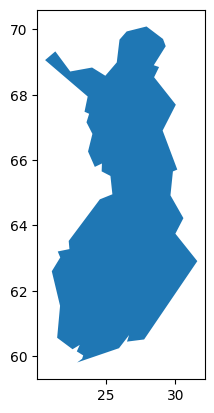

In [8]:
geo.plot()

<b>Ćwiczenie 5.</b> Zapisz plik w formacie GeoPackage pod nazwą ``mysterious-polygon.gpkg``.

In [9]:
geo.to_file("mysterious-polygon.gpkg")

In [10]:
import pathlib

assert (pathlib.Path().resolve() / 'mysterious-polygon.gpkg').exists(), 'Plik nie został zapisany!'

<b>Ćwiczenie 6.</b> Wczytaj dane z pliku ``some_posts.csv`` do obiektu typu DataFrame o nazwie <i>data</i>.

In [11]:
import pandas as pd

data=pd.read_csv('some_posts.csv', sep=',')

Zweryfikuj poprawność kodu.

In [12]:
print(f'Number of rows: {len(data)}')

Number of rows: 81379


<b>Ćwiczenie 7.</b> Do zmiennej <i>data</i> dodaj kolumnę o nazwie <i>geometry</i>. Wstaw do niej obiekty typu Point utworzone na podstawie kolumn <i>lon</i> i <i>lat</i>.

In [13]:
from shapely.geometry import Point
data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)


Zweryfikuj poprawność kodu.

In [14]:
data['geometry'].head()

0    POINT (31.484633302 -24.980792492)
1    POINT (31.508905612 -25.499224667)
2    POINT (30.930866066 -24.342578456)
3     POINT (31.519718439 -24.85461393)
4    POINT (31.520835558 -24.921068894)
Name: geometry, dtype: object

<b>Ćwiczenie 8.</b> Przekonwertuj zmienną <i>data</i> z typu DataFrame na typ GeoDataFrame. Ustaw przestrzenny układ odniesienia na EPSG:4326.

In [15]:
data = gpd.GeoDataFrame(
    data,
    geometry='geometry',
    crs='EPSG:4326'
)

Zweryfikuj poprawność kodu.

In [16]:
data.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)


In [17]:
print(data.crs)

EPSG:4326


<b>Ćwiczenie 9.</b> Zapisz plik w formacie Shapefile pod nazwą ``kruger_points.shp``.

In [18]:
data.to_file("kruger_points.shp")

Zweryfikuj poprawność kodu.

In [19]:
import pathlib

assert (pathlib.Path().resolve() / 'kruger_points.shp').exists(), 'Plik nie został zapisany!'

<b>Ćwiczenie 10.</b> Zwizualizuj punkty.

<Axes: >

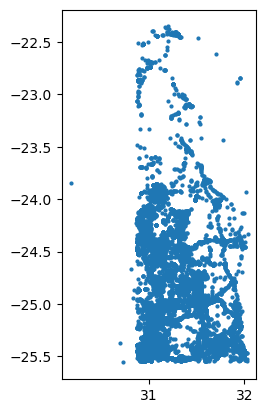

In [35]:
data.plot(marker='o', markersize=4)

<b>Ćwiczenie 11.</b> Wczytaj dane z pliku ``kruger_points.shp`` do obiektu typu GeoDataFrame o nazwie <i>kruger_points</i>.

In [21]:
kruger_points = gpd.read_file('kruger_points.shp')

Zweryfikuj poprawność kodu.

In [22]:
kruger_points.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)


<b>Ćwiczenie 12.</b> Przeprowadź projekcję danych na układ odniesienia EPSG:32735, w którym domyślną jednostką są metry.

In [23]:
kruger_points = kruger_points.to_crs(epsg=32735)

Zweryfikuj poprawność kodu.

In [24]:
import pyproj

assert kruger_points.crs == pyproj.CRS('EPSG:32735'), 'Błędnie wykonana projekcja!'

<b>Ćwiczenie 13.</b> Pogrupuj dane po kolumnie <i>userid</i> i zapisz w zmiennej o nazwie <i>grouped_by_users</i>.

In [25]:
grouped_by_users = kruger_points.groupby('userid')

Zweryfikuj poprawność kodu.

In [26]:
assert len(grouped_by_users.groups) == kruger_points['userid'].nunique(), 'Błędna liczba grup!'

<b>Ćwiczenie 14.</b> Dla każdego użytkownika posortuj rezultaty po kolumnie <i>timestamp</i> i utwórz obiekt typu LineString na podstawie przypisanych mu punktów. Pamiętaj, aby pominąć użytkowników, którzy posiadają mniej niż dwa punkty. Rezultaty (zawierające kolumny <i>userid</i> i <i>geometry</i>) zapisz w obiekcie typu GeoDataFrame o nazwie <i>movements</i>. Pamiętaj o weryfikacji układu odniesienia.

In [36]:
from shapely.geometry import LineString

lines = []

for userid, group in grouped_by_users:
    group_sorted = group.sort_values("timestamp")

    if len(group_sorted) >= 2:
        line = LineString(group_sorted["geometry"].tolist())
        lines.append({"userid": userid, "geometry": line})

movements = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326")

Zweryfikuj poprawność kodu.

In [ ]:
movements.head()

,userid,geometry
0,16301,"LINESTRING (942231.63037 7254606.86776, 938934..."
1,45136,"LINESTRING (905394.50015 7193375.14849, 905394..."
2,50136,"LINESTRING (944551.60685 7253384.18284, 963788..."
3,88775,"LINESTRING (902800.81655 7192546.97505, 902800..."
4,88918,"LINESTRING (959332.96075 7219877.71476, 963788..."
5,90156,"LINESTRING (944913.75049 7243343.21497, 944910..."
6,174181,"LINESTRING (917419.75944 7174642.12298, 917419..."
7,177600,"LINESTRING (935144.51899 7306112.35733, 937399..."
8,181216,"LINESTRING (955378.99547 7250186.08255, 955376..."
9,184404,"LINESTRING (915839.08521 7225103.52845, 916335..."


<b>Ćwiczenie 15.</b> Do zmiennej <i>movements</i> dodaj kolumnę o nazwie <i>distance</i>, która będzie przechowywać długość linii.

In [29]:
movements['distance'] = movements.geometry.length

C:\Users\rtome\AppData\Local\Temp\ipykernel_15888\2590617842.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  movements['distance'] = movements.geometry.length


Zweryfikuj poprawność kodu.

In [30]:
movements['distance'].head()

0    328455.115430
1         0.000000
2    159189.081019
3         0.080245
4      9277.252211
Name: distance, dtype: float64

<b>Ćwiczenie 16.</b> Odpowiedz na poniższe pytania i zapisz ich rezultaty w podanych zmiennych:<br/>
1. Jaki był najkrótszy dystans pokonany przez użytkownika (zapisz wynik w zmiennej <i>shortest_distance</i>)?<br/>
2. Jaki był średni dystans pokonany przez użytkownika (zapisz wynik w zmiennej <i>mean_distance</i>)?<br/>
3. Jaki był najdłuższy dystans pokonany przez użytkownika (zapisz wynik w zmiennej <i>longest_distance</i>)?

In [ ]:
shortest_distance = movements['distance'].min()
mean_distance = movements['distance'].mean()
longest_distance = movements['distance'].max()

print(shortest_distance)
print(mean_distance)
print(longest_distance)

0.0
107133.51202944393
6970668.816343964


<b>Ćwiczenie 17.</b> Zapisz plik w formacie Shapefile pod nazwą ``movements.shp``.

In [32]:
movements.to_file("movements.shp")

Zweryfikuj poprawność kodu.

In [33]:
assert (pathlib.Path().resolve() / 'movements.shp').exists(), 'Plik nie został zapisany!'